# Who Will Buy Bananas? 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Assignment</a></span></li><li><span><a href="#Load-Packages-and-Data" data-toc-modified-id="Load-Packages-and-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Packages and Data</a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary:" data-toc-modified-id="Data-Dictionary:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Dictionary:</a></span></li></ul></li><li><span><a href="#Examine-the-Data" data-toc-modified-id="Examine-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examine the Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Model-Validation" data-toc-modified-id="Model-Validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Validation</a></span></li><li><span><a href="#Summary-and-Next-Steps" data-toc-modified-id="Summary-and-Next-Steps-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary and Next Steps</a></span></li></ul></div>

## Assignment
Your business partners are interested in developing a program that will drive sales of bananas within stores. In order to do this they would like you to build a model that predicts if a customer will buy bananas.

In the sections below, please do the following:

- Load any packages you may use and the data set given into a Pandas data frame.
- Familiarize yourself with the data.
- Perform EDA to identify which data may be useful in predicting banana sales.
- Train a model to predict whether a customer is likely to buy bananas based on the other information provided in the data.
- Validate your model.
- Summarize your results and discuss any next steps.

## Load Packages and Data
In this section, do the following:

- Load any packages you may need.
- Load the data set from file which can be found in "customer_baskets.csv".

In [1]:
# the necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# other packages you may need
#import 

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 1.5})

In [2]:
# Load the data.
data = pd.read_csv('data/customer_baskets.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 17 columns):
Unnamed: 0            6114 non-null int64
order_id              6114 non-null object
order_time            6114 non-null object
store_number          6114 non-null int64
item_count            6114 non-null int64
order_total           6114 non-null float64
median_price          6114 non-null float64
avacado_count         6114 non-null float64
bodyspray_count       6114 non-null float64
apple_count           6114 non-null float64
gatorade_count        6114 non-null float64
ice_count             6114 non-null float64
pizza_count           6114 non-null float64
berries_count         6114 non-null float64
bought_gasoline       6114 non-null bool
bought_coffeemaker    6114 non-null bool
bought_bananas        6114 non-null bool
dtypes: bool(3), float64(9), int64(3), object(2)
memory usage: 686.7+ KB


### Data Dictionary:

* order_id - unique identifier for a customer order
* order_time - date and time that the order was placed
* store_number - store in which the order occurred
* item_count - total number of items in the order
* order_total - total price paid for the entire order i.e. the sum of the individual item prices
* median_price - median price of all items in the order
* avocado_count - number of avocados in the order
* bodyspray_count - number of bodysprays in the order
* apple_count - number of apples in the order
* gatorade_count - number of gatorades in the order
* ice_count - number of ice bags in the order
* pizza_count - number of pizzas in the order
* berries_count - number of berries in the order
* bought_gasoline - indicates if customer bought gasoline
* bought_coffeemaker - indicates if customer bought a coffeemaker
* bought_bananas - indicates if customer bought bananas

In [3]:
# let's take a look
data.head(2)

,Unnamed: 0,order_id,order_time,store_number,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count,bought_gasoline,bought_coffeemaker,bought_bananas
0,0,00014264214799084246,2017-07-22 23:16:58,2222,11,27.53,1.72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
1,1,00014661201792013216,2017-07-22 19:53:56,2222,15,32.63,1.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True


## Examine the Data
Familiarize yourself with the data for modeling.

In [4]:
data.describe()

,Unnamed: 0,store_number,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count
count,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000
mean,3056.500000,2890.526169,11.124305,43.285273,2.807246,0.110402,0.003762,0.006869,0.073111,0.012758,0.008669,0.093392
std,1765.104105,543.924374,15.318119,65.966091,2.219057,0.352709,0.066353,0.093736,0.461209,0.176765,0.140423,0.326503
min,0.000000,2222.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1528.250000,2222.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3056.500000,3333.000000,3.000000,7.330000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4584.750000,3333.000000,16.000000,65.162500,2.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6113.000000,3333.000000,113.000000,980.900000,65.890000,6.000000,2.000000,3.000000,10.000000,6.000000,5.000000,4.000000


In [5]:
data['store_number'].unique()  # data for 2 stores only 

array([2222, 3333])

In [6]:
data['order_time'] = pd.to_datetime(data['order_time'])

In [7]:
data['order_time'].min()  , data['order_time'].max()  # data for 2 days only 

(Timestamp('2017-07-22 00:00:24'), Timestamp('2017-07-23 23:59:28'))

In [8]:
data.groupby(['bought_bananas', 'store_number'])['store_number'].agg({'count'})

count
bought_bananas store_number       
False          2222            857
               3333           3023
True           2222           1578
               3333            656

In [9]:
data.groupby(['bought_bananas','order_time'])['order_time'].agg({'count'})

count
bought_bananas order_time                
False          2017-07-22 00:00:24      1
               2017-07-22 00:00:54      1
               2017-07-22 00:01:03      1
               2017-07-22 00:01:14      1
               2017-07-22 00:01:24      2
               2017-07-22 00:01:26      1
               2017-07-22 00:01:32      1
               2017-07-22 00:01:44      1
               2017-07-22 00:02:31      1
               2017-07-22 00:03:10      1
               2017-07-22 00:03:27      1
               2017-07-22 00:03:42      1
               2017-07-22 00:04:28      1
               2017-07-22 00:04:31      1
               2017-07-22 00:05:12      1
               2017-07-22 00:05:42      1
               2017-07-22 00:05:49      1
               2017-07-22 00:06:11      1
               2017-07-22 00:06:35      1
               2017-07-22 00:06:42      1
               2017-07-22 00:06:45      1
               2017-07-22 00:06:50      1
               2017-07-22 00:08:42      1
               2017-07-22 00:08:45      1
               2017-07-22 00:08:52      1
               2017-07-22 00:09:13      1
               2017-07-22 00:09:20      1
               2017-07-22 00:09:38      1
               2017-07-22 00:09:53      1
               2017-07-22 00:10:07      1
...                                   ...
True           2017-07-23 23:35:06      1
               2017-07-23 23:35:46      1
               2017-07-23 23:36:11      1
               2017-07-23 23:36:30      1
               2017-07-23 23:37:03      2
               2017-07-23 23:37:43      1
               2017-07-23 23:37:55      1
               2017-07-23 23:38:19      1
               2017-07-23 23:40:02      1
               2017-07-23 23:41:04      1
               2017-07-23 23:42:21      1
               2017-07-23 23:42:56      1
               2017-07-23 23:44:04      1
               2017-07-23 23:45:45      1
               2017-07-23 23:46:21      1
               2017-07-23 23:46:58      1
               2017-07-23 23:47:17      1
               2017-07-23 23:47:56      1
               2017-07-23 23:48:01      1
               2017-07-23 23:48:08      1
               2017-07-23 23:48:42      1
               2017-07-23 23:50:14      1
               2017-07-23 23:51:33      1
               2017-07-23 23:51:44      1
               2017-07-23 23:51:58      1
               2017-07-23 23:53:14      1
               2017-07-23 23:53:35      1
               2017-07-23 23:56:54      1
               2017-07-23 23:57:58      1
               2017-07-23 23:59:12      1

[6005 rows x 1 columns]

## Exploratory Data Analysis
Perform an EDA to:
- Verify data quality
- Understand uni-variate behaviors for possible features
- Examine relationships across features
- Examine the target

In [10]:
data.columns

Index(['Unnamed: 0', 'order_id', 'order_time', 'store_number', 'item_count',
       'order_total', 'median_price', 'avacado_count', 'bodyspray_count',
       'apple_count', 'gatorade_count', 'ice_count', 'pizza_count',
       'berries_count', 'bought_gasoline', 'bought_coffeemaker',
       'bought_bananas'],
      dtype='object')

In [11]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
cat_cols = ['bought_gasoline', 'bought_coffeemaker','bought_bananas']

In [13]:
for cat in cat_cols: 
    data[cat] = pd.Categorical(data[cat])
    
    

In [14]:
data.select_dtypes('category').describe()

,bought_gasoline,bought_coffeemaker,bought_bananas
count,6114,6114,6114
unique,2,2,2
top,False,False,False
freq,3210,6112,3880


In [15]:
data['bought_bananas'].value_counts()

False    3880
True     2234
Name: bought_bananas, dtype: int64

In [16]:
data.isnull().sum()

order_id              0
order_time            0
store_number          0
item_count            0
order_total           0
median_price          0
avacado_count         0
bodyspray_count       0
apple_count           0
gatorade_count        0
ice_count             0
pizza_count           0
berries_count         0
bought_gasoline       0
bought_coffeemaker    0
bought_bananas        0
dtype: int64

## Correlations

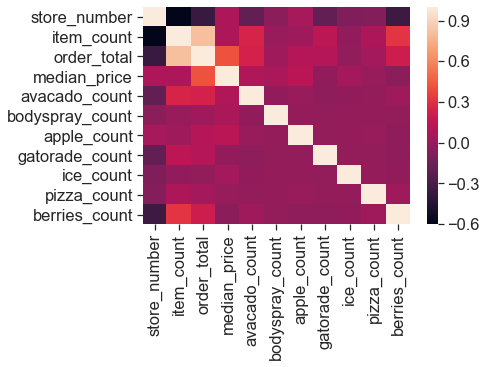

In [17]:
sns.heatmap(data.corr(method='pearson'))

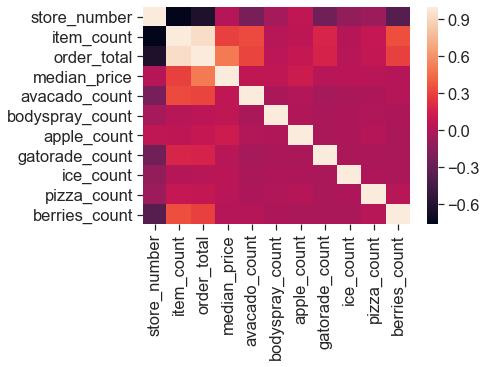

In [18]:
sns.heatmap(data.corr(method='spearman'))

In [19]:
from scipy import stats

In [20]:
non_cat_cols= ['store_number', 'item_count',
       'order_total', 'median_price', 'avacado_count', 'bodyspray_count',
       'apple_count', 'gatorade_count', 'ice_count', 'pizza_count',
       'berries_count']

for cat in cat_cols:
    for non_cat in non_cat_cols:
        rel = stats.pointbiserialr(data[cat], data[non_cat])
        if rel.pvalue < 0.05:
            #print(cat, non_cat, rel, 'significant')
            print(cat, non_cat, rel.correlation, 'significant')
        else:
            #print(cat, non_cat, rel, 'non-significant') 
            print(cat, non_cat, rel.correlation, 'non-significant') 

bought_gasoline store_number 0.7738029457322042 significant
bought_gasoline item_count -0.6286965497149655 significant
bought_gasoline order_total -0.5940989300401007 significant
bought_gasoline median_price -0.3095210178044744 significant
bought_gasoline avacado_count -0.29774426215353916 significant
bought_gasoline bodyspray_count -0.05392945136675523 significant
bought_gasoline apple_count -0.06971059601005619 significant
bought_gasoline gatorade_count -0.1507875794273883 significant
bought_gasoline ice_count -0.06865235084507312 significant
bought_gasoline pizza_count -0.05872085021578956 significant
bought_gasoline berries_count -0.27208481328751344 significant
bought_coffeemaker store_number -0.022235082039970773 non-significant
bought_coffeemaker item_count -0.009004376621486896 non-significant
bought_coffeemaker order_total 0.004675795660062443 non-significant
bought_coffeemaker median_price 0.09614034437061128 significant
bought_coffeemaker avacado_count -0.005662665865559561 

- 'bought_coffeemaker' has no significant relationship with any of the other variables

In [21]:
from scipy.stats import chi2_contingency

In [22]:

for cat in cat_cols:
    for cat_ in cat_cols:
        if cat_ != cat:
            observed_freq= pd.crosstab(data[cat], data[cat_] ).to_numpy()
            chi, pvalue, ddof, expected = chi2_contingency(observed_freq)

            if pvalue < 0.05:  # NULL must go 
                print(cat, cat_, 'Dependent variables')
            else: 
                print(cat, cat_, 'Independent variables') 

bought_gasoline bought_coffeemaker Independent variables
bought_gasoline bought_bananas Dependent variables
bought_coffeemaker bought_gasoline Independent variables
bought_coffeemaker bought_bananas Independent variables
bought_bananas bought_gasoline Dependent variables
bought_bananas bought_coffeemaker Independent variables


- bought_coffeemaker has again no impact on bought_gasoline, bought_bananas

## Visualization

/Users/adeela/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/adeela/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


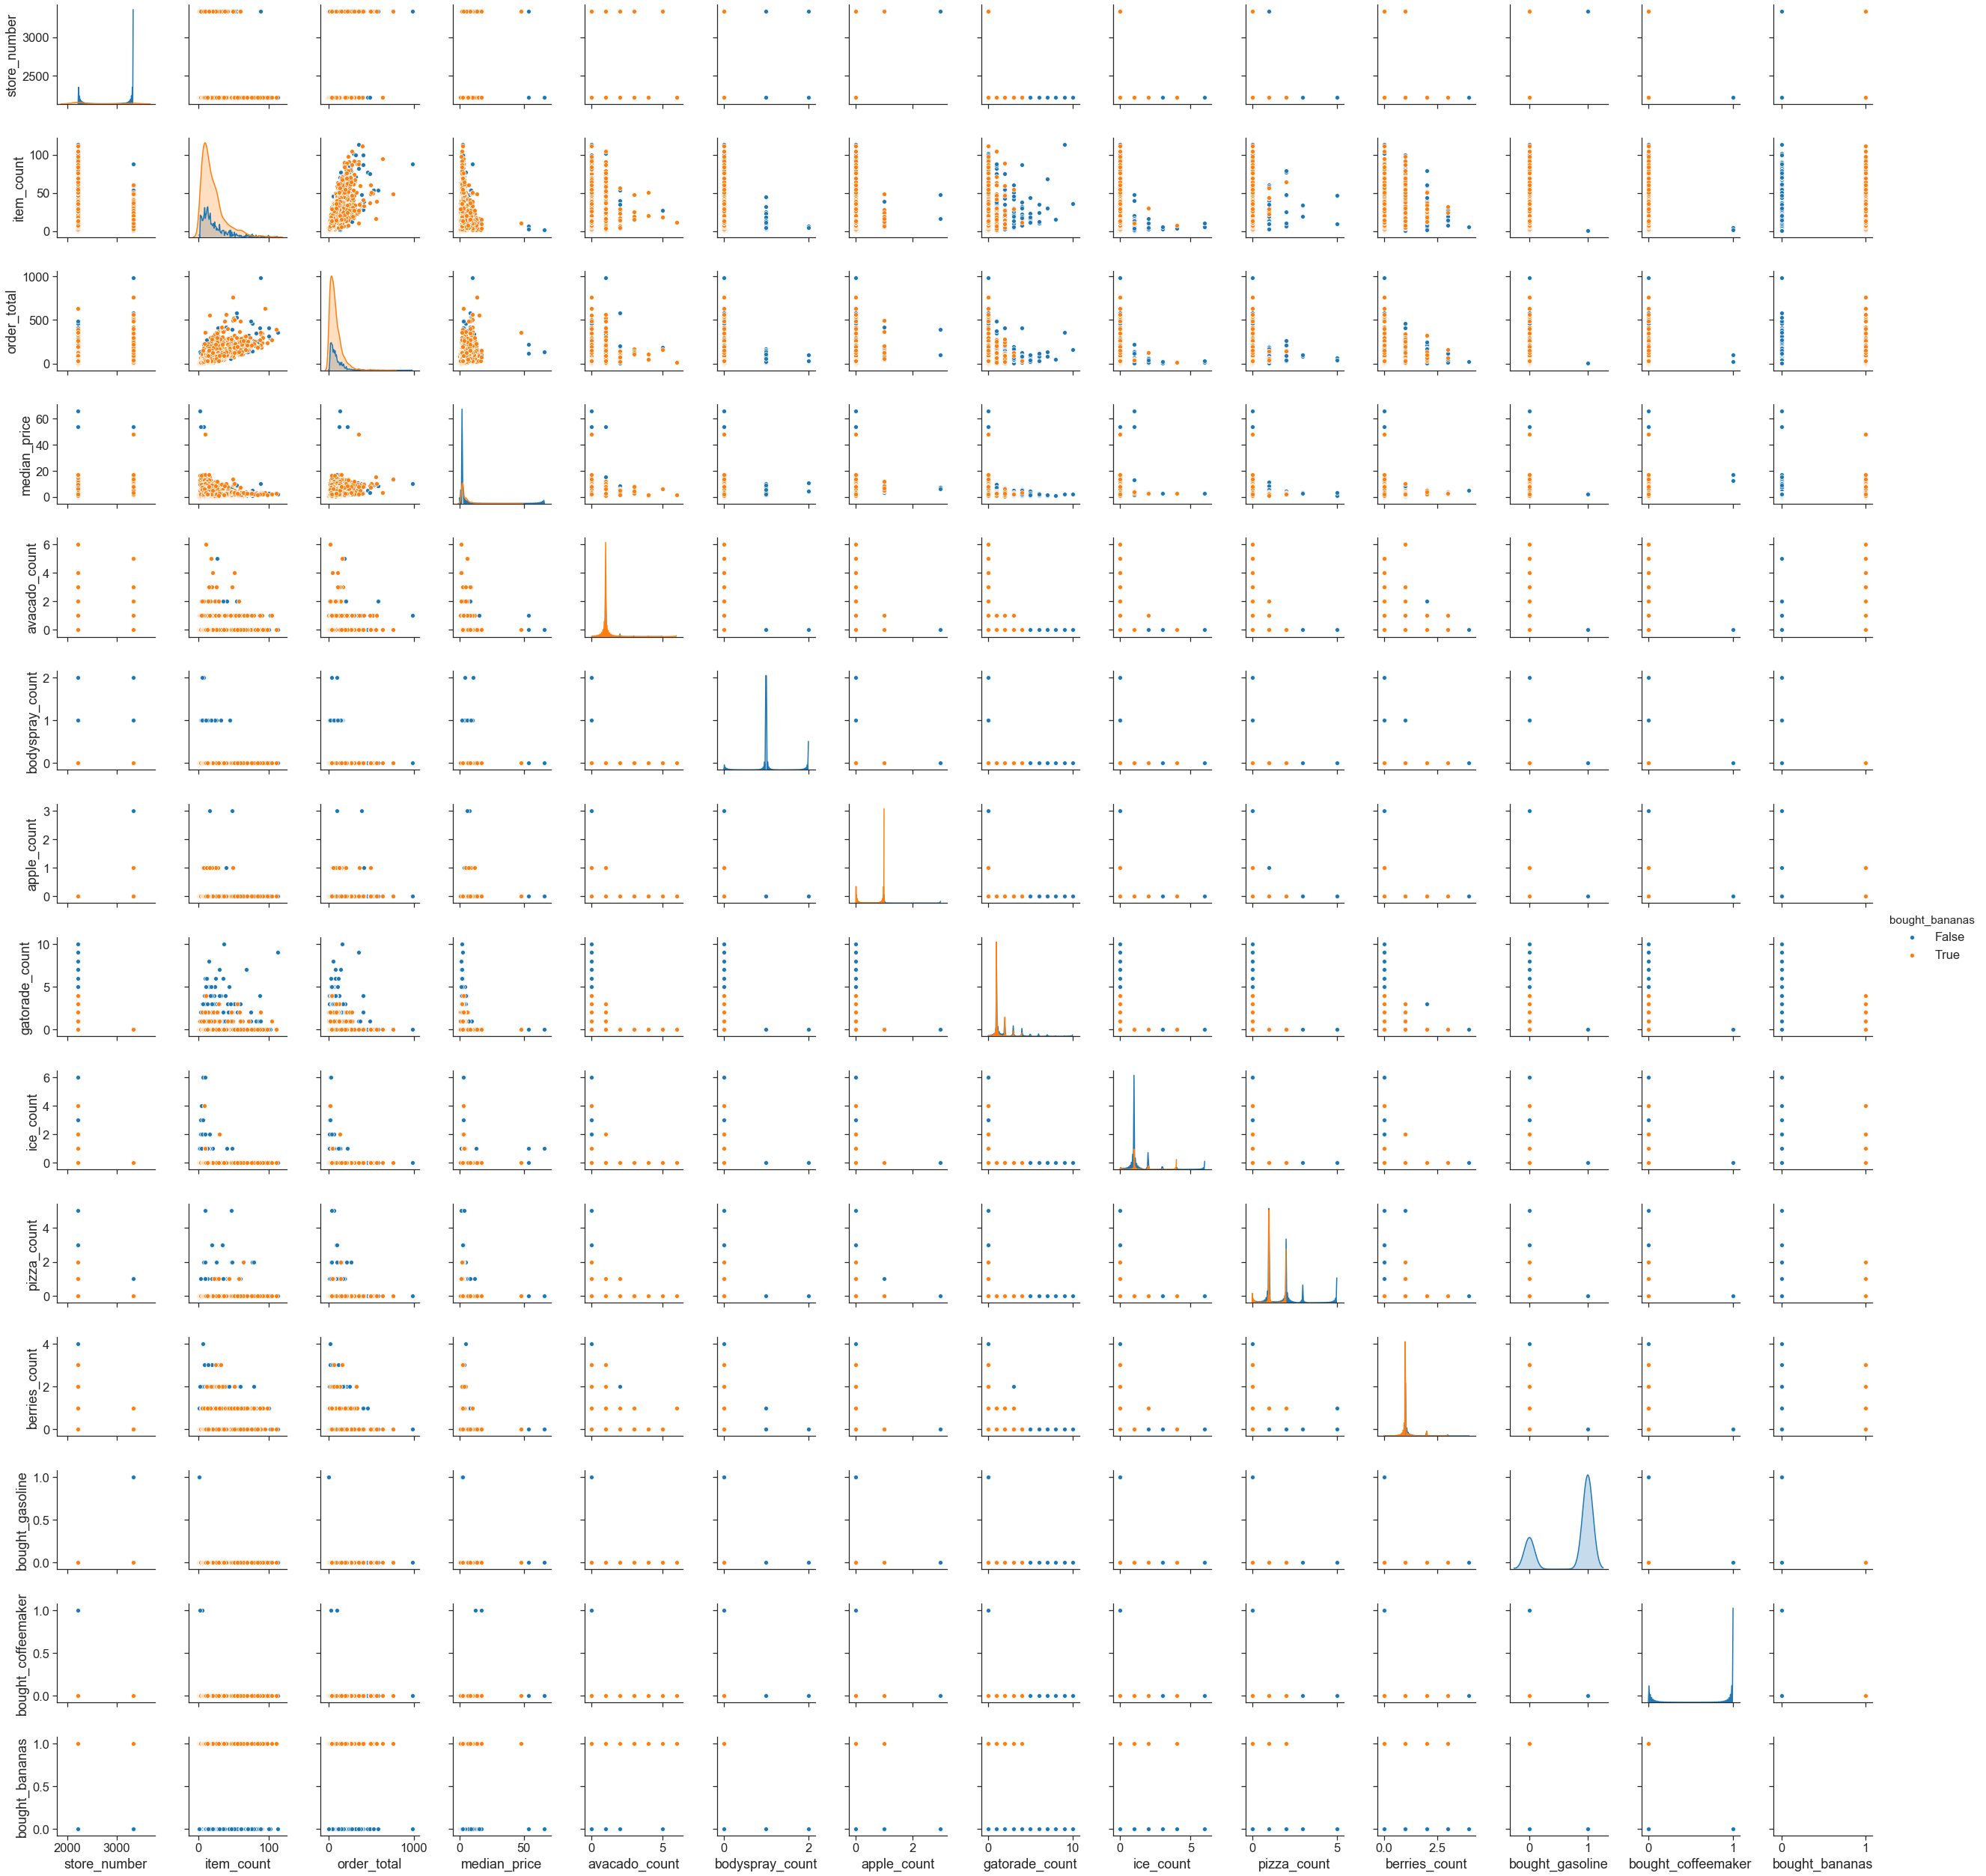

In [23]:
sns.pairplot(data, hue='bought_bananas')
plt.show()

In [24]:
pd.crosstab(data['bought_coffeemaker'], data['bought_bananas'])

bought_bananas,False,True
bought_coffeemaker,,
False,3878,2234
True,2,0


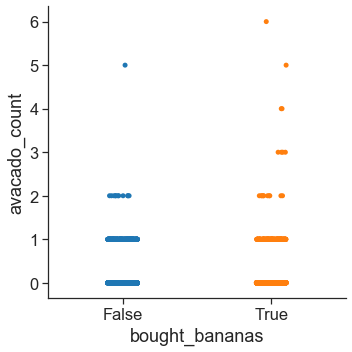

In [25]:
sns.catplot(data=data, x='bought_bananas', y='avacado_count')
plt.show()

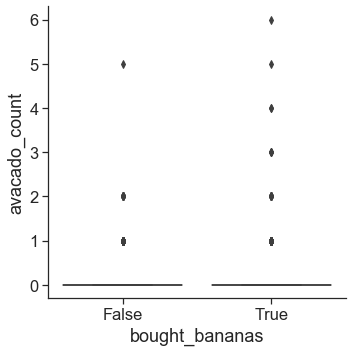

In [64]:
sns.catplot(data=data, x='bought_bananas', y='avacado_count', kind='box')
plt.show()

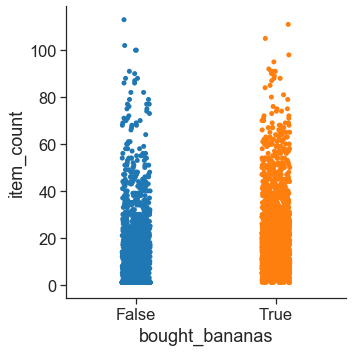

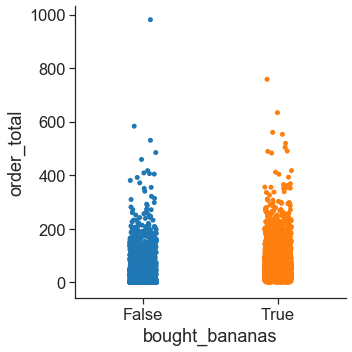

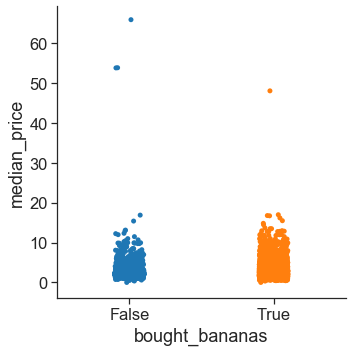

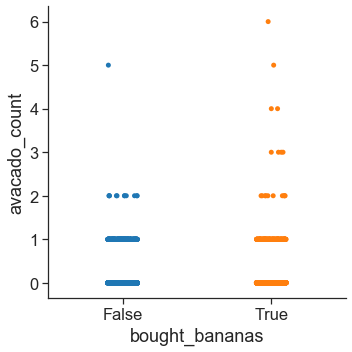

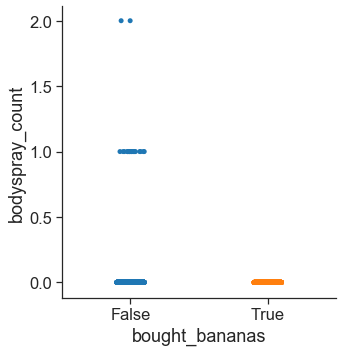

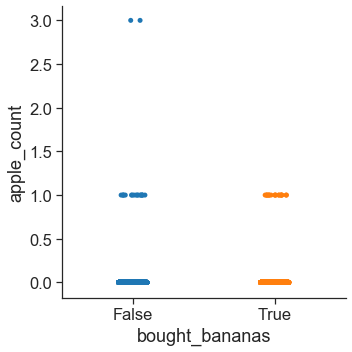

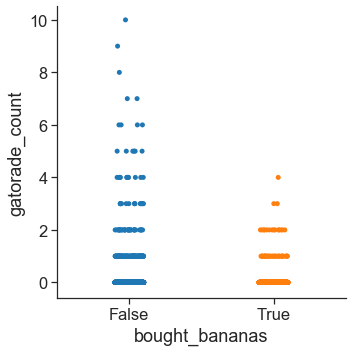

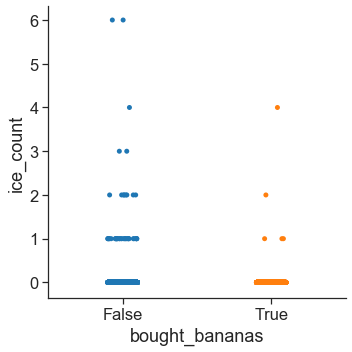

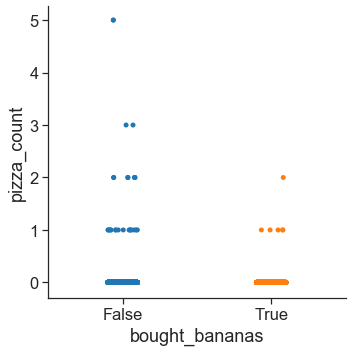

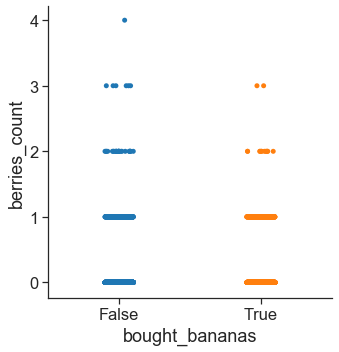

In [26]:
for cat in ['item_count', 'order_total', 'median_price', 'avacado_count', 'bodyspray_count',
       'apple_count', 'gatorade_count', 'ice_count', 'pizza_count',
       'berries_count']:
    sns.catplot(data=data, x='bought_bananas', y=cat)
    plt.show()   

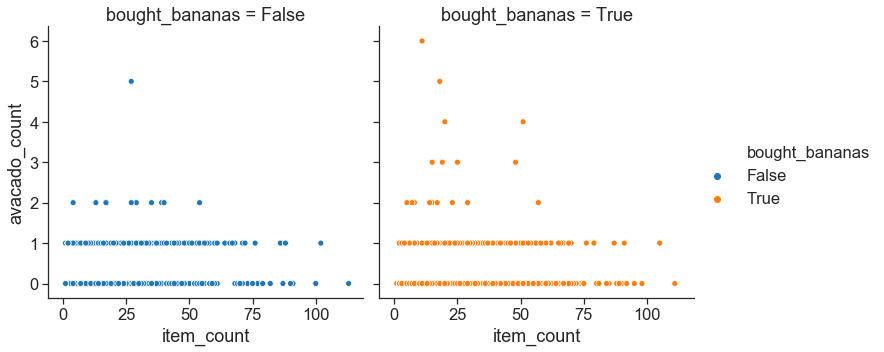

In [27]:
sns.relplot(data =data, x = 'item_count', y='avacado_count', hue='bought_bananas', col='bought_bananas')
plt.show()

KeyboardInterrupt: 

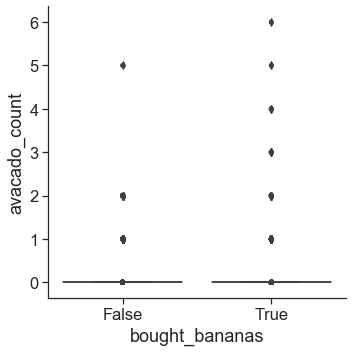

In [67]:
sns.catplot(data=data, x='bought_bananas', y='avacado_count', kind='box')
sns.swarmplot(data=data, x='bought_bananas', y='avacado_count', color=".25")
plt.show()

## Modeling
Train a model to predict if a customer will buy bananas.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 16 columns):
order_id              6114 non-null object
order_time            6114 non-null datetime64[ns]
store_number          6114 non-null int64
item_count            6114 non-null int64
order_total           6114 non-null float64
median_price          6114 non-null float64
avacado_count         6114 non-null float64
bodyspray_count       6114 non-null float64
apple_count           6114 non-null float64
gatorade_count        6114 non-null float64
ice_count             6114 non-null float64
pizza_count           6114 non-null float64
berries_count         6114 non-null float64
bought_gasoline       6114 non-null category
bought_coffeemaker    6114 non-null category
bought_bananas        6114 non-null category
dtypes: category(3), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 639.2+ KB


In [29]:
data.columns

Index(['order_id', 'order_time', 'store_number', 'item_count', 'order_total',
       'median_price', 'avacado_count', 'bodyspray_count', 'apple_count',
       'gatorade_count', 'ice_count', 'pizza_count', 'berries_count',
       'bought_gasoline', 'bought_coffeemaker', 'bought_bananas'],
      dtype='object')

In [30]:
# Not using columns : 'order_id', 'order_time', 'store_number', 'bought_coffeemaker'

In [31]:
model_data = data[['item_count', 'order_total','median_price', 'avacado_count', 'bodyspray_count', 'apple_count',
       'gatorade_count', 'ice_count', 'pizza_count', 'berries_count',
       'bought_gasoline', 'bought_bananas']]
model_data.head()

,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count,bought_gasoline,bought_bananas
0,11,27.53,1.720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,15,32.63,1.480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
2,7,37.00,5.530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False
3,6,35.67,6.245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
4,15,43.11,2.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True


In [32]:
from sklearn.preprocessing import  LabelEncoder

In [33]:
lb = LabelEncoder() 
model_data['bought_gasoline'] = lb.fit_transform(model_data['bought_gasoline'])

/Users/adeela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
model_data.head()

,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count,bought_gasoline,bought_bananas
0,11,27.53,1.720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
1,15,32.63,1.480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
2,7,37.00,5.530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,False
3,6,35.67,6.245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
4,15,43.11,2.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True


In [35]:
X = model_data.iloc[:, :-1]
X.head()

,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count,bought_gasoline
0,11,27.53,1.720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,15,32.63,1.480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,37.00,5.530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,6,35.67,6.245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,15,43.11,2.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
Y = model_data.iloc[:, -1]
Y.head()

0    False
1     True
2    False
3     True
4     True
Name: bought_bananas, dtype: category
Categories (2, object): [False, True]

In [37]:
lb = LabelEncoder() 
Y = lb.fit_transform(Y)

In [38]:
##add dummies for categorical variables 

In [39]:
gasoline_dummies= pd.get_dummies(X['bought_gasoline'])
gasoline_dummies.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [40]:
gasoline_dummies.rename(columns={0:'gasoline_no', 1:'gasoline_yes'}, inplace=True)
gasoline_dummies.head()

,gasoline_no,gasoline_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [41]:
X = pd.merge(X,gasoline_dummies, right_index=True, left_index=True )
X.head()

,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count,bought_gasoline,gasoline_no,gasoline_yes
0,11,27.53,1.720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,15,32.63,1.480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,7,37.00,5.530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,6,35.67,6.245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,15,43.11,2.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [42]:
X.drop(columns=['bought_gasoline'], inplace=True)
X.head()

,item_count,order_total,median_price,avacado_count,bodyspray_count,apple_count,gatorade_count,ice_count,pizza_count,berries_count,gasoline_no,gasoline_yes
0,11,27.53,1.720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,15,32.63,1.480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,7,37.00,5.530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
3,6,35.67,6.245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,15,43.11,2.590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 12 columns):
item_count         6114 non-null int64
order_total        6114 non-null float64
median_price       6114 non-null float64
avacado_count      6114 non-null float64
bodyspray_count    6114 non-null float64
apple_count        6114 non-null float64
gatorade_count     6114 non-null float64
ice_count          6114 non-null float64
pizza_count        6114 non-null float64
berries_count      6114 non-null float64
gasoline_no        6114 non-null uint8
gasoline_yes       6114 non-null uint8
dtypes: float64(9), int64(1), uint8(2)
memory usage: 489.7 KB


In [44]:
X = X.values

In [45]:
X

array([[11.  , 27.53,  1.72, ...,  0.  ,  1.  ,  0.  ],
       [15.  , 32.63,  1.48, ...,  0.  ,  1.  ,  0.  ],
       [ 7.  , 37.  ,  5.53, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.  ,  2.  ,  2.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  2.  ,  2.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  2.32,  2.32, ...,  0.  ,  0.  ,  1.  ]])

In [46]:
Y

array([0, 1, 0, ..., 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [49]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((4891, 12), (1223, 12), (4891,), (1223,))

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)

In [52]:
rc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
y_pred = rc.predict(X_test)

In [54]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

## Model Validation
Validate your model results and discuss the model performance.

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[704,  64],
       [ 76, 379]])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(Y_test, y_pred)

0.8855273916598528

In [59]:
rc.feature_importances_

array([0.33127611, 0.11207809, 0.10992414, 0.03941898, 0.01097936,
       0.00542667, 0.05007708, 0.02211699, 0.01173303, 0.04982139,
       0.10421197, 0.15293619])

## Summary and Next Steps
Summarize your results and discuss any addition step you would take given more time.

- convert order_time to a categorical varaible : possibly three ranges ('morning', 'after-noon', 'evening') and then analyze its affect on banana's sale
- check for of other indicative null values other than 'nan'
- box plots to visualize data distribution/ identification of outliers
- Visualization for feature importance 
- Parameter Tunning for RandomForest with stratified cross validation
- Model using other methods .. for this small dataset start with DT 
